In [1]:
import shutil
import os

ROOT_DIR = '/content/Blood_cell'

if os.path.exists(ROOT_DIR):
    shutil.rmtree(ROOT_DIR)
    print(ROOT_DIR, 'is removed !')

In [5]:
import zipfile
import os

DATA_ROOT_PATH = '/content/drive/MyDrive/Git/ICT_Visual/Data'

with zipfile.ZipFile(os.path.join(DATA_ROOT_PATH,'Blood_cell.zip')) as target_file:

    target_file.extractall('Blood_cell')

In [6]:
TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TRAIN')
TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST')
TEST_SIMPLE_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST_SIMPLE')

# 전체 데이터 개수 확인

In [7]:
# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST
test_label_list = os.listdir(TEST_DATA_ROOT_DIR)
for label_name in test_label_list:

    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST SIMPLE
test_simple_label_list = os.listdir(TEST_SIMPLE_DATA_ROOT_DIR)
for label_name in test_simple_label_list:

    print(f'test simple {label_name} => {len(os.listdir(os.path.join(TEST_SIMPLE_DATA_ROOT_DIR, label_name)))}')

print('=============================================')

train NEUTROPHIL => 2499
train EOSINOPHIL => 2497
train LYMPHOCYTE => 2483
train MONOCYTE => 2478
test NEUTROPHIL => 624
test EOSINOPHIL => 623
test LYMPHOCYTE => 620
test MONOCYTE => 620
test simple NEUTROPHIL => 48
test simple EOSINOPHIL => 13
test simple LYMPHOCYTE => 6
test simple MONOCYTE => 4


# 이미지 사이즈 통계


In [8]:
import numpy as np
import glob
import cv2

# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    label_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    
    img_file_list = glob.glob(label_path + '/*.jpeg')
    width_list = []
    height_list = []

    for file_name in img_file_list:
        try:

            src_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
            width_list.append(src_img.shape[0])
            height_list.append(src_img.shape[1])
        except Exception as err:
            print(str(err), file_name)
    width_np = np.array(width_list)
    height_np = np.array(width_list)
    print('==========================================================================================')
    print(label_name, 'avg width :', np.average(width_np), 'average height :', np.average(height_np)) 
    print(label_name, 'std width :', np.std(width_np), 'average height :', np.std(height_np)) 
    print(label_name, 'max width :', np.max(width_np), 'average height :', np.max(height_np)) 
    print(label_name, 'min width :', np.min(width_np), 'average height :', np.min(height_np)) 
    print('==========================================================================================')

NEUTROPHIL avg width : 240.0 average height : 240.0
NEUTROPHIL std width : 0.0 average height : 0.0
NEUTROPHIL max width : 240 average height : 240
NEUTROPHIL min width : 240 average height : 240
EOSINOPHIL avg width : 240.0 average height : 240.0
EOSINOPHIL std width : 0.0 average height : 0.0
EOSINOPHIL max width : 240 average height : 240
EOSINOPHIL min width : 240 average height : 240
LYMPHOCYTE avg width : 240.0 average height : 240.0
LYMPHOCYTE std width : 0.0 average height : 0.0
LYMPHOCYTE max width : 240 average height : 240
LYMPHOCYTE min width : 240 average height : 240
MONOCYTE avg width : 240.0 average height : 240.0
MONOCYTE std width : 0.0 average height : 0.0
MONOCYTE max width : 240 average height : 240
MONOCYTE min width : 240 average height : 240


# Test에 Test simple 결합

In [9]:
label_list = os.listdir(TEST_DATA_ROOT_DIR)
print(label_list)
for label_name in label_list:

    test_simple_path = os.path.join(TEST_SIMPLE_DATA_ROOT_DIR,label_name) 
    test_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    file_name_list = os.listdir(test_simple_path)
    
    move_nums = 0

    for file_name in file_name_list:
        try:
            shutil.move(os.path.join(test_simple_path,file_name),
                        os.path.join(test_path,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(move_nums, 'is moved into ',label_name, '(TEST_SIMPLE -> TEST) ')        

['NEUTROPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE']
48 is moved into  NEUTROPHIL (TEST_SIMPLE -> TEST) 
13 is moved into  EOSINOPHIL (TEST_SIMPLE -> TEST) 
6 is moved into  LYMPHOCYTE (TEST_SIMPLE -> TEST) 
4 is moved into  MONOCYTE (TEST_SIMPLE -> TEST) 


# Train에 Test 결합

In [10]:
label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(label_list)
for label_name in label_list:

    train_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name) 
    test_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    file_name_list = os.listdir(test_path)
    
    move_nums = 0

    for file_name in file_name_list:
        try:
            shutil.move(os.path.join(test_path,file_name),
                        os.path.join(train_path,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(move_nums, 'is moved into ',label_name, '(TEST -> TRAIN) ')        

['NEUTROPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE']
672 is moved into  NEUTROPHIL (TEST -> TRAIN) 
636 is moved into  EOSINOPHIL (TEST -> TRAIN) 
626 is moved into  LYMPHOCYTE (TEST -> TRAIN) 
624 is moved into  MONOCYTE (TEST -> TRAIN) 


# Train Test Split

In [11]:
import random

split_ratio = 0.2

label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(label_list)

for label_name in label_list:

    train_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name) 
    test_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    file_name_list = os.listdir(train_path)

    random.shuffle(file_name_list)
    split_num = int(len(file_name_list)*split_ratio)

    test_file_name_list = file_name_list[0:split_num]
    move_nums = 0

    for file_name in test_file_name_list:
        try:
            shutil.move(os.path.join(train_path,file_name),
                        os.path.join(test_path,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(move_nums, 'is moved into ',label_name, '(TRAIN -> TEST)')

['NEUTROPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE']
634 is moved into  NEUTROPHIL (TRAIN -> TEST)
626 is moved into  EOSINOPHIL (TRAIN -> TEST)
621 is moved into  LYMPHOCYTE (TRAIN -> TEST)
619 is moved into  MONOCYTE (TRAIN -> TEST)


# 전체 데이터 확인

In [12]:
# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST
test_label_list = os.listdir(TEST_DATA_ROOT_DIR)
for label_name in test_label_list:

    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

train NEUTROPHIL => 2537
train EOSINOPHIL => 2507
train LYMPHOCYTE => 2487
train MONOCYTE => 2476
test NEUTROPHIL => 634
test EOSINOPHIL => 626
test LYMPHOCYTE => 621
test MONOCYTE => 619


# 이미지 사이즈 정의

In [13]:
IMG_WIDTH = 240
IMG_HEIGHT = 240

# ImageDataGenerator 정의

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
test_simple_gen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = train_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                           batch_size=32, color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
test_data = train_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                          batch_size=32, color_mode='rgb',
                                          class_mode='sparse',
                                          target_size=(IMG_WIDTH, IMG_HEIGHT))                                                                                      
test_simple_data = train_gen.flow_from_directory(directory=TEST_SIMPLE_DATA_ROOT_DIR,
                                                 batch_size=32, color_mode='rgb',
                                                 class_mode='sparse',
                                                 target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 10007 images belonging to 4 classes.
Found 2500 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [16]:
print(train_data.class_indices)
print(train_data.num_classes)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
4


# 모델링

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

In [18]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

17235968/17225924 [==============================] - 0s 0us/step


In [19]:
class_nums = train_data.num_classes
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [20]:
model.compile(optimizer=Adam(2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=30,
                 validation_data=test_data,
                 callbacks=[earlystop])

end_time = datetime.now()

print('\n\nElapsed time => ', end_time - start_time)


Epoch 1/30
313/313 [==============================] - 133s 381ms/step - loss: 1.6275 - acc: 0.3175 - val_loss: 1.1600 - val_acc: 0.5340
Epoch 2/30
313/313 [==============================] - 117s 375ms/step - loss: 1.2164 - acc: 0.4541 - val_loss: 0.8929 - val_acc: 0.7564
Epoch 3/30
313/313 [==============================] - 117s 374ms/step - loss: 0.8933 - acc: 0.6313 - val_loss: 0.4983 - val_acc: 0.8708
Epoch 4/30
313/313 [==============================] - 117s 375ms/step - loss: 0.6097 - acc: 0.7617 - val_loss: 0.3041 - val_acc: 0.9132
Epoch 5/30
313/313 [==============================] - 117s 375ms/step - loss: 0.4503 - acc: 0.8321 - val_loss: 0.1972 - val_acc: 0.9392
Epoch 6/30
313/313 [==============================] - 117s 374ms/step - loss: 0.3380 - acc: 0.8806 - val_loss: 0.1331 - val_acc: 0.9616
Epoch 7/30
313/313 [==============================] - 117s 375ms/step - loss: 0.2505 - acc: 0.9155 - val_loss: 0.0937 - val_acc: 0.9716
Epoch 8/30
313/313 [============================

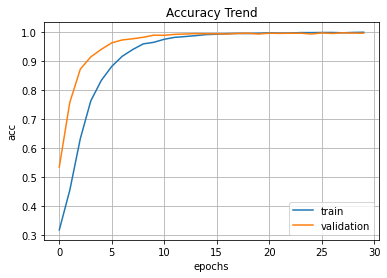

In [22]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()

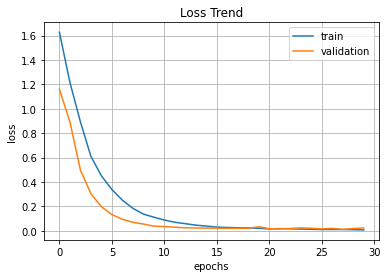

In [23]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [24]:
model.evaluate(test_data)

79/79 [==============================] - 8s 103ms/step - loss: 0.0234 - acc: 0.9948


[0.02337823249399662, 0.9947999715805054]